Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
df = pd.read_csv(r'C:\Users\ABCD\OneDrive\Documents\_CP30-EduSpend\SDS-CP030-edu-spend\submissions\team-members\lakshay-yadav\data\International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [4]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


Checking for Missing Values

In [5]:
# Check for missing data
df.isnull().sum().sort_values(ascending=False)

# Percentage of missing values
df.isnull().mean() * 100

Country              0.0
City                 0.0
University           0.0
Program              0.0
Level                0.0
Duration_Years       0.0
Tuition_USD          0.0
Living_Cost_Index    0.0
Rent_USD             0.0
Visa_Fee_USD         0.0
Insurance_USD        0.0
Exchange_Rate        0.0
dtype: float64

Plot Feature Distributions

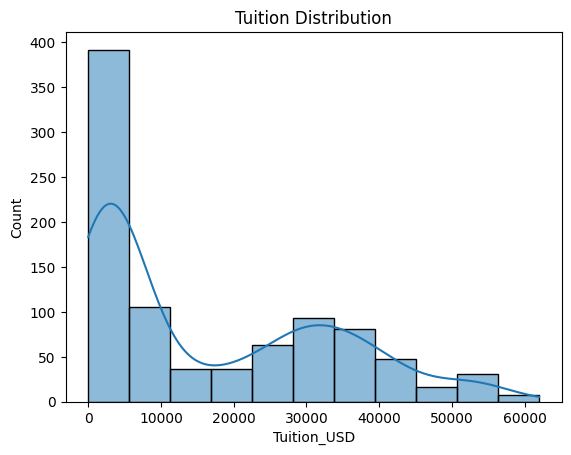

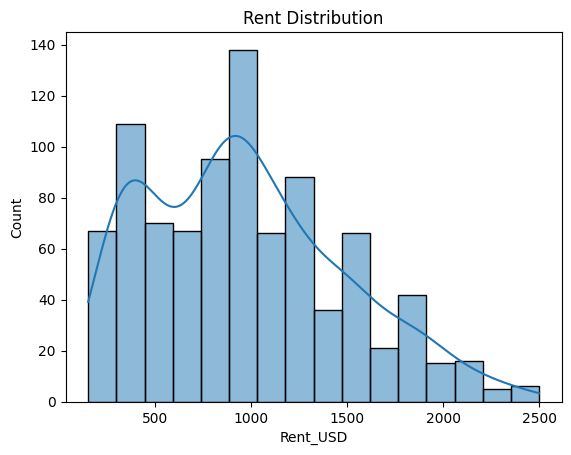

In [6]:
# Tuition Distribution
sns.histplot(df['Tuition_USD'], kde=True)
plt.title('Tuition Distribution')
plt.show()

# Rent Distribution
sns.histplot(df['Rent_USD'], kde=True)
plt.title('Rent Distribution')
plt.show()

Correlation Heatmap

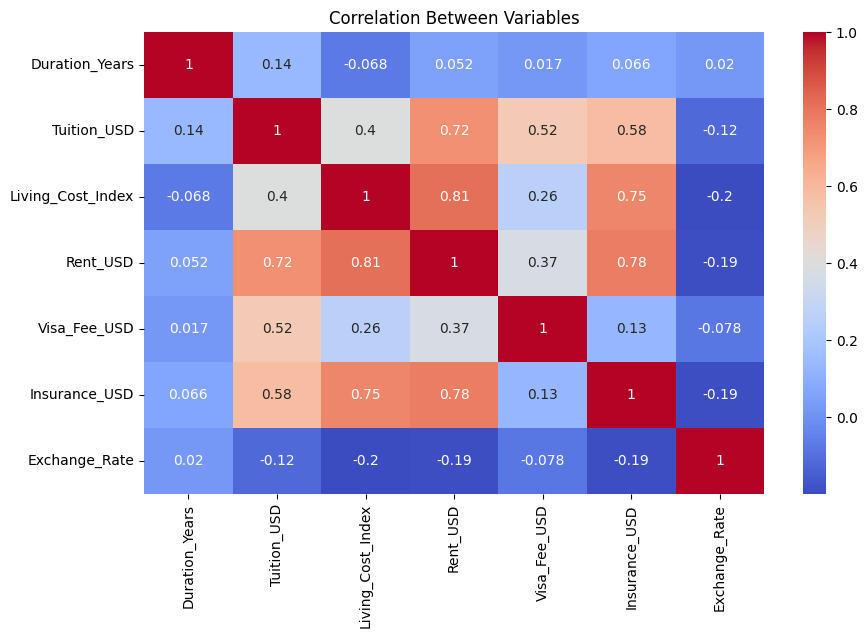

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

Computing Total Cost of Attendance (TCA): (tuition + rent × months + visa + insurance × years)

In [8]:
# Assuming standard duration and months
DURATION_YEARS = 1
MONTHS = 12

df['TCA'] = df['Tuition_USD'] + (df['Rent_USD'] * MONTHS) + df['Visa_Fee_USD'] + (df['Insurance_USD'] * DURATION_YEARS)
df[['Country', 'City', 'Level', 'TCA']].head()

,Country,City,Level,TCA
0,USA,Cambridge,Master,83460
1,UK,London,Master,64085
2,Canada,Toronto,Master,58835
3,Australia,Melbourne,Master,59900
4,Germany,Munich,Master,14325


Visualizing TCA by Country and Degree Level

In [9]:
import plotly.express as px

# Average TCA by Country
avg_tca_country = df.groupby('Country')['TCA'].mean().reset_index()
fig = px.bar(avg_tca_country.sort_values(by='TCA', ascending=False), x='Country', y='TCA', title='Average TCA by Country')
fig.show()

# TCA by Level
fig = px.box(df, x='Level', y='TCA', title='TCA Distribution by Degree Level')
fig.show()

In [10]:
# Creating labels as Low/Medium/High using quantiles
df['Affordability_Tier'] = pd.qcut(df['TCA'], q=3, labels=['Low', 'Medium', 'High'])
df[['TCA', 'Affordability_Tier']].head()


,TCA,Affordability_Tier
0,83460,High
1,64085,High
2,58835,High
3,59900,High
4,14325,Medium


In [11]:
# Visualizing TCA by Affordability Tier
fig = px.box(df, x='Affordability_Tier', y='TCA', title='TCA Distribution by Affordability Tier')
fig.show()

Saving Clean Data

In [12]:
#df.to_csv('cleaned_education_costs.csv', index=False)

Phase 2

Feature engineering (scaling numeric values, encoding categories)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import joblib

# Selecting features and targets
features = ['Country', 'City', 'Level', 'Tuition_USD', 'Rent_USD', 'Insurance_USD']
target_reg = 'TCA'
target_cls = 'Affordability_Tier'

X = df[features]
y_reg = df[target_reg]
y_cls_raw = df[target_cls]  # preserving raw labels for encoding

# Encoding classification target before splitting
le = LabelEncoder()
y_cls = le.fit_transform(y_cls_raw)

# Splitting data
X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
    X, y_reg, y_cls, test_size=0.2, random_state=42)

# Defining transformers
cat_cols = ['Country', 'City', 'Level']
num_cols = ['Tuition_USD', 'Rent_USD', 'Insurance_USD']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# ✅ Fitting preprocessor and save it for deployment
preprocessor.fit(X_train)

os.makedirs("preprocessing", exist_ok=True)
joblib.dump(preprocessor, "preprocessing/preprocessor.pkl")
print("✅ Preprocessor saved to preprocessing/preprocessor.pkl")

✅ Preprocessor saved to preprocessing/preprocessor.pkl


In [14]:
print(X_train.shape)
print(y_cls_train.shape)


(725, 6)
(725,)


Training regressor models to predict TCA  
Random Forest  
XGBoost  
Gradient Boosting

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

regressors = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
for name, model in regressors.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_reg_train)
    preds = pipeline.predict(X_test)

    print(f"\n📊 {name} - Regression Metrics:")
    print(f"MAE: {mean_absolute_error(y_reg_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_reg_test, preds)):.2f}")
    print(f"R² Score: {r2_score(y_reg_test, preds):.2f}")


📊 Random Forest - Regression Metrics:
MAE: 447.05
RMSE: 673.05
R² Score: 1.00

📊 XGBoost - Regression Metrics:
MAE: 514.19
RMSE: 807.72
R² Score: 1.00

📊 Gradient Boosting - Regression Metrics:
MAE: 484.78
RMSE: 663.77
R² Score: 1.00


In [16]:
import sklearn
import xgboost
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)


scikit-learn: 1.3.2
xgboost: 2.0.3


Training classification models to label destinations as Low, Medium, or High cost  
Random Forest  
XGBoost  
Gradient Boosting

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in classifiers.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_cls_train)
    preds = pipe.predict(X_test)
    print(f"\n📊 {name} - Classification Metrics:")
    print(f"Accuracy: {accuracy_score(y_cls_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_cls_test, preds, average='weighted'):.2f}")


📊 Random Forest - Classification Metrics:
Accuracy: 0.93
F1 Score: 0.93

📊 XGBoost - Classification Metrics:
Accuracy: 0.95
F1 Score: 0.95

📊 Gradient Boosting - Classification Metrics:
Accuracy: 0.92
F1 Score: 0.92


Model Evaluation 

Evaluating Classification Models — Confusion Matrix & F1 Score


🧮 Random Forest - Confusion Matrix & Report


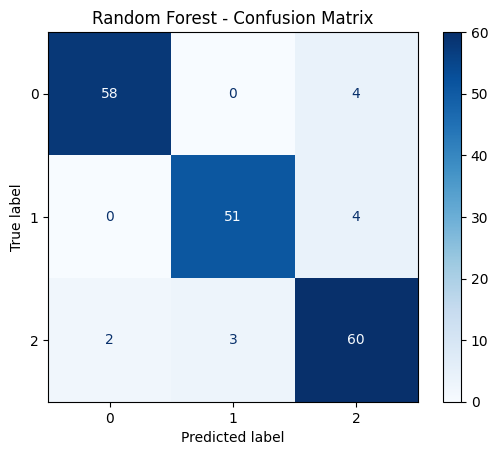

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        62
           1       0.94      0.93      0.94        55
           2       0.88      0.92      0.90        65

    accuracy                           0.93       182
   macro avg       0.93      0.93      0.93       182
weighted avg       0.93      0.93      0.93       182


🧮 XGBoost - Confusion Matrix & Report


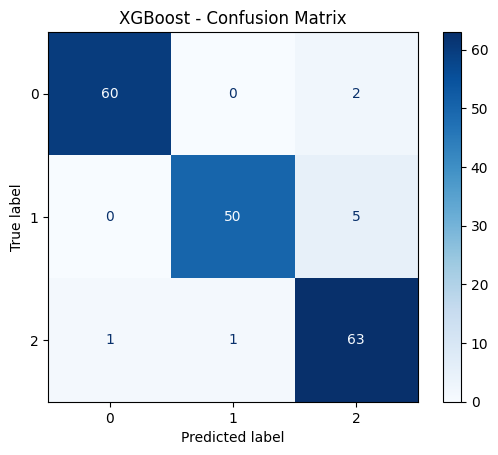

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.98      0.91      0.94        55
           2       0.90      0.97      0.93        65

    accuracy                           0.95       182
   macro avg       0.95      0.95      0.95       182
weighted avg       0.95      0.95      0.95       182


🧮 Gradient Boosting - Confusion Matrix & Report


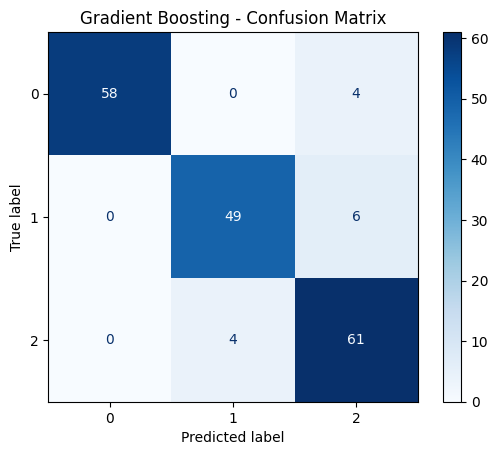

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.92      0.89      0.91        55
           2       0.86      0.94      0.90        65

    accuracy                           0.92       182
   macro avg       0.93      0.92      0.92       182
weighted avg       0.93      0.92      0.92       182



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

for name, model in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_cls_train)
    preds = pipeline.predict(X_test)

    print(f"\n🧮 {name} - Confusion Matrix & Report")
    cm = confusion_matrix(y_cls_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    print(classification_report(y_cls_test, preds))


Visualizing clustering using PCA

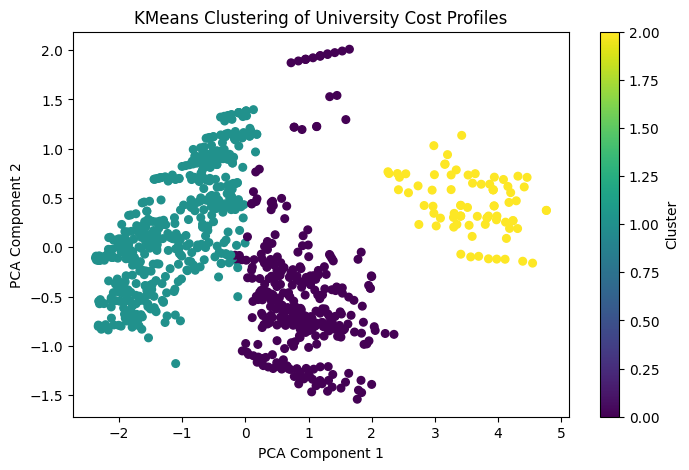

In [19]:
# ✅ Clustering Section with Sparse to Dense Fix

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Transform and convert to dense
X_scaled_sparse = preprocessor.fit_transform(X)
X_scaled = X_scaled_sparse.toarray() if hasattr(X_scaled_sparse, "toarray") else X_scaled_sparse

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("KMeans Clustering of University Cost Profiles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

MLflow Logging

Regression logging

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np

# Initialize MLflow client and experiment
client = MlflowClient()
experiment_name = "EduSpend_Predictive_Models"

# Get or create experiment
experiment = client.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = client.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

# ✅ Clear all previous runs (safe version)
try:
    all_runs = client.search_runs([experiment_id])
    for run in all_runs:
        run_id = run.info.run_id
        client.delete_run(run_id)
    print("🧹 Previous runs deleted successfully.")
except Exception as e:
    print(f"⚠️ Failed to delete runs: {e}")

# Define regression models
regressors = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

mlflow.set_experiment(experiment_name)

# Logging each model
for name, model in regressors.items():
    with mlflow.start_run(run_name=f"{name} Regressor"):
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        pipeline.fit(X_train, y_reg_train)
        preds = pipeline.predict(X_test)

        mlflow.log_param("model_name", name)
        mlflow.log_metric("MAE", mean_absolute_error(y_reg_test, preds))
        mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_reg_test, preds)))
        mlflow.log_metric("R2", r2_score(y_reg_test, preds))

        signature = infer_signature(X_test, preds)
        input_example = pd.DataFrame(X_test[:1], columns=X_test.columns)
        mlflow.sklearn.log_model(sk_model=pipeline, artifact_path="regression_model", signature=signature, input_example=input_example)

        print(f"✅ Logged {name} Regressor to MLflow")

🧹 Previous runs deleted successfully.
✅ Logged Random Forest Regressor to MLflow
✅ Logged XGBoost Regressor to MLflow
✅ Logged Gradient Boosting Regressor to MLflow


Classification logging

In [21]:
from sklearn.metrics import accuracy_score, f1_score

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, verbosity=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

mlflow.set_experiment("EduSpend_Predictive_Models")

for name, model in classifiers.items():
    with mlflow.start_run(run_name=f"{name} Classifier"):
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        pipeline.fit(X_train, y_cls_train)
        preds = pipeline.predict(X_test)

        mlflow.log_param("model_name", name)
        mlflow.log_metric("Accuracy", accuracy_score(y_cls_test, preds))
        mlflow.log_metric("F1 Score", f1_score(y_cls_test, preds, average='weighted'))

        signature = infer_signature(X_test, preds)
        input_example = pd.DataFrame(X_test[:1], columns=X_test.columns)
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path="classification_model",
            signature=signature,
            input_example=input_example
        )

        print(f"✅ Logged {name} Classifier to MLflow")

✅ Logged Random Forest Classifier to MLflow
✅ Logged XGBoost Classifier to MLflow
✅ Logged Gradient Boosting Classifier to MLflow


✅ Fetching Model Metrics from MLflow

In [22]:
from mlflow.tracking import MlflowClient
import pandas as pd

client = MlflowClient()
experiment_name = "EduSpend_Predictive_Models"
experiment = client.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Fetching all runs safely
runs = client.search_runs([experiment_id])
model_run_map = {}

for run in runs:
    run_data = run.data
    run_name = run_data.tags.get("mlflow.runName", "Unnamed Run")
    metrics = run_data.metrics

    entry = {"Model": run_name}
    entry.update(metrics)
    model_run_map[run.info.run_id] = entry  # Use run_id as key to prevent overwrite

mlflow_metrics_df = pd.DataFrame(model_run_map.values())
mlflow_metrics_df = mlflow_metrics_df.sort_values(by='Model').reset_index(drop=True)
mlflow_metrics_df

,Model,Accuracy,F1 Score,MAE,R2,RMSE
0,Gradient Boosting Classifier,0.923077,0.923899,NaN,NaN,NaN
1,Gradient Boosting Regressor,NaN,NaN,484.779085,0.998984,663.773772
2,Random Forest Classifier,0.928571,0.928930,NaN,NaN,NaN
3,Random Forest Regressor,NaN,NaN,447.050604,0.998955,673.052852
4,XGBoost Classifier,0.950549,0.950776,NaN,NaN,NaN
5,XGBoost Regressor,NaN,NaN,514.189162,0.998496,807.718927


📊 Regression Model Comparison Plot (MAE, RMSE, R²)

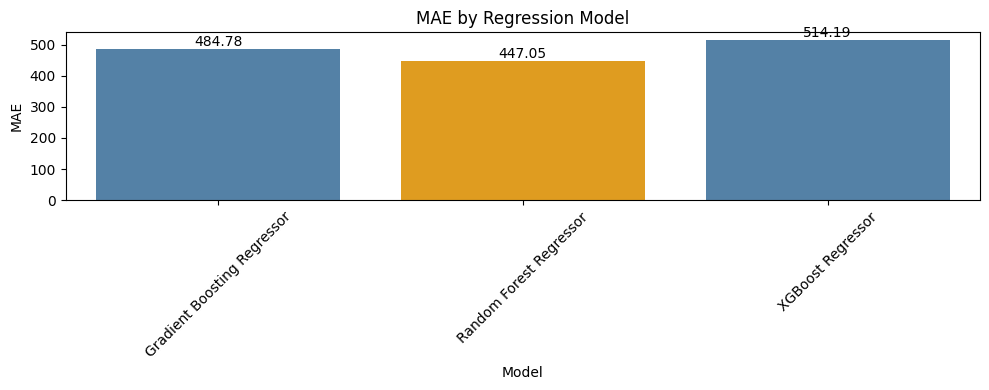

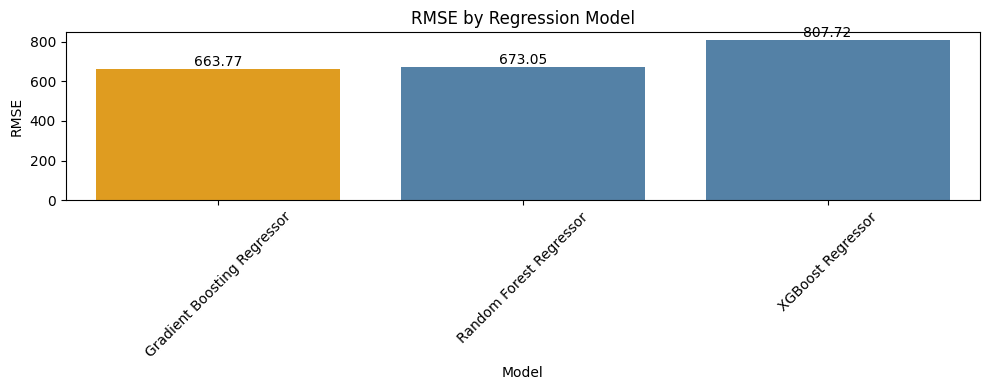

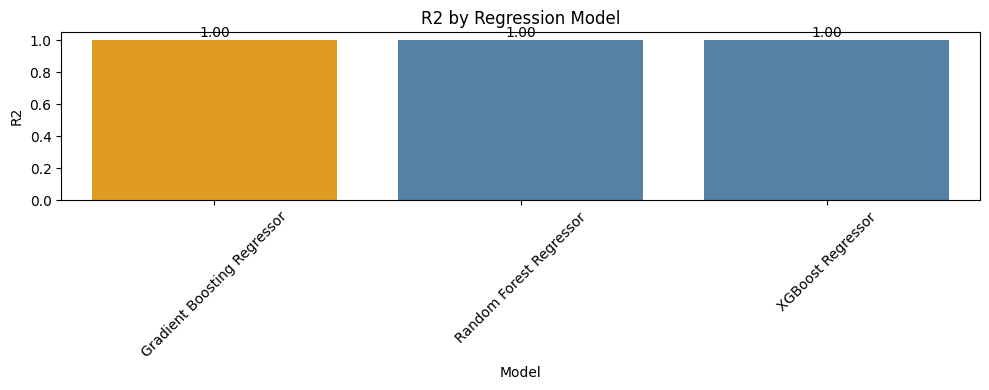

In [23]:
def highlight_best(df, metric, higher_is_better=True):
    best_idx = df[metric].idxmax() if higher_is_better else df[metric].idxmin()
    return ['orange' if i == best_idx else 'steelblue' for i in df.index]


regression_metrics_df = mlflow_metrics_df[mlflow_metrics_df['Model'].str.contains("Regressor")]
regression_metrics = {
    "MAE": False,
    "RMSE": False,
    "R2": True
}

for metric, higher_is_better in regression_metrics.items():
    if metric in regression_metrics_df.columns:
        plt.figure(figsize=(10, 4))
        ax = sns.barplot(
            x='Model',
            y=metric,
            data=regression_metrics_df,
            palette=highlight_best(regression_metrics_df, metric, higher_is_better)
        )
        plt.title(f"{metric} by Regression Model")
        plt.xticks(rotation=45)
        plt.tight_layout()

        for p in ax.patches:
            value = p.get_height()
            ax.annotate(f"{value:.2f}", (p.get_x() + p.get_width() / 2, value),
                        ha='center', va='bottom', fontsize=10)

        plt.show()

📊 Classification Model Comparison Plot (Accuracy, F1 Score)

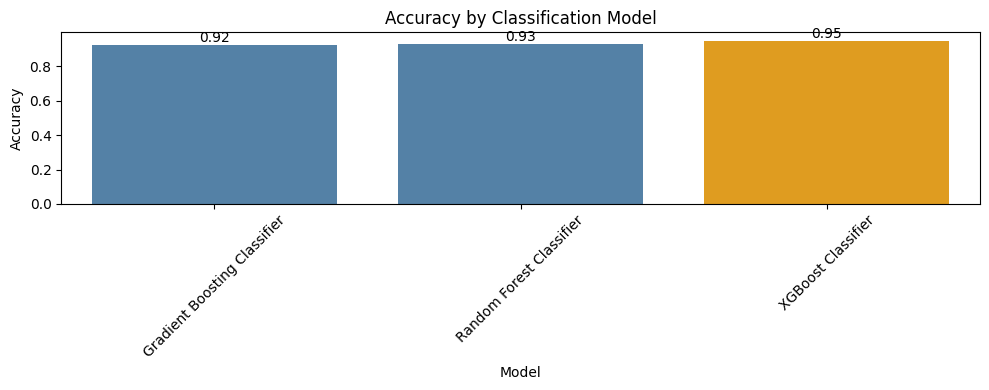

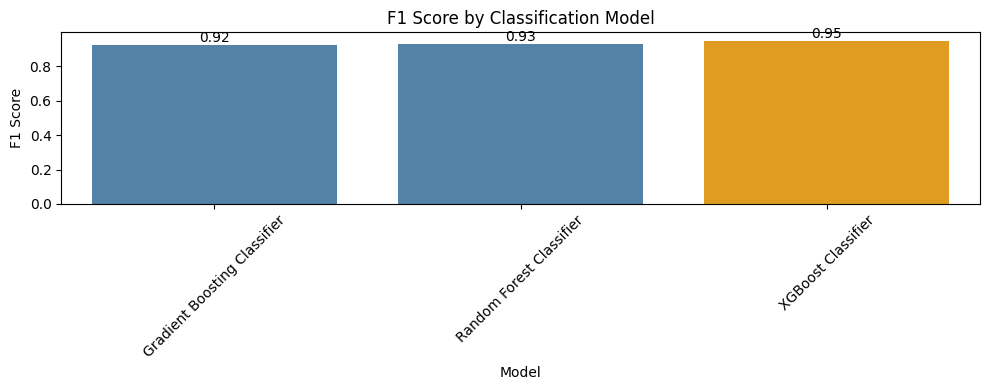

In [24]:
classification_metrics_df = mlflow_metrics_df[mlflow_metrics_df['Model'].str.contains("Classifier")]
classification_metrics = {
    "Accuracy": True,
    "F1 Score": True
}

for metric, higher_is_better in classification_metrics.items():
    if metric in classification_metrics_df.columns:
        plt.figure(figsize=(10, 4))
        ax = sns.barplot(
            x='Model',
            y=metric,
            data=classification_metrics_df,
            palette=highlight_best(classification_metrics_df, metric, higher_is_better)
        )
        plt.title(f"{metric} by Classification Model")
        plt.xticks(rotation=45)
        plt.tight_layout()

        for p in ax.patches:
            value = p.get_height()
            ax.annotate(f"{value:.2f}", (p.get_x() + p.get_width() / 2, value),
                        ha='center', va='bottom', fontsize=10)

        plt.show()

✅ Auto-Selecting Best Model from MLflow by Metric

In [25]:
from mlflow.tracking import MlflowClient
import pandas as pd

client = MlflowClient()
experiment = client.get_experiment_by_name("EduSpend_Predictive_Models")
experiment_id = experiment.experiment_id
runs = client.search_runs(experiment_id)

# Collect run info
metrics_list = []
run_ids = []
for run in runs:
    run_name = run.data.tags.get("mlflow.runName", "Unnamed Run")
    run_id = run.info.run_id
    data = run.data.metrics
    entry = {"Run ID": run_id, "Model": run_name}
    entry.update(data)
    metrics_list.append(entry)

mlflow_metrics_df = pd.DataFrame(metrics_list)

🔍 1. Best Regression Model (lowest RMSE)

In [26]:
best_reg = mlflow_metrics_df[mlflow_metrics_df['Model'].str.contains("Regressor")]
best_reg_model = best_reg.sort_values("RMSE").iloc[0]
print("🏆 Best Regressor:")
print(best_reg_model)

🏆 Best Regressor:
Run ID      0497f6bf37904d50a0f52134ff66ecf2
Model            Gradient Boosting Regressor
Accuracy                                 NaN
F1 Score                                 NaN
MAE                               484.779085
R2                                  0.998984
RMSE                              663.773772
Name: 3, dtype: object


🔍 2. Best Classification Model (highest F1 Score or Accuracy)

In [27]:
best_cls = mlflow_metrics_df[mlflow_metrics_df['Model'].str.contains("Classifier")]
best_cls_model = best_cls.sort_values("F1 Score", ascending=False).iloc[0]
print("🏆 Best Classifier:")
print(best_cls_model)

🏆 Best Classifier:
Run ID      181b636b512c428cb1a22403be5158df
Model                     XGBoost Classifier
Accuracy                            0.950549
F1 Score                            0.950776
MAE                                      NaN
R2                                       NaN
RMSE                                     NaN
Name: 1, dtype: object


✅ Hyperparameter Tuning with RandomizedSearchCV

Regression Models

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Defining hyperparameter spaces for regression models
regressor_params = {
    'Random Forest': {
        'model': [RandomForestRegressor(random_state=42)],
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': [XGBRegressor(random_state=42, verbosity=0)],
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__subsample': [0.7, 0.8, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': [GradientBoostingRegressor(random_state=42)],
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        }
    }
}

# Running RandomizedSearchCV for each regressor
for name, config in regressor_params.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'][0])
    ])
    
    search = RandomizedSearchCV(pipe, config['params'], n_iter=25, cv=5,
                                scoring='neg_root_mean_squared_error', random_state=42,
                                verbose=1, n_jobs=-1)
    search.fit(X_train, y_reg_train)
    
    print(f"\n🔍 Best parameters for {name}:")
    print(search.best_params_)
    print(f"📉 Best RMSE (CV): {-search.best_score_:.2f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits

🔍 Best parameters for Random Forest:
{'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
📉 Best RMSE (CV): 896.71
Fitting 5 folds for each of 25 candidates, totalling 125 fits

🔍 Best parameters for XGBoost:
{'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05}
📉 Best RMSE (CV): 592.68
Fitting 5 folds for each of 18 candidates, totalling 90 fits

🔍 Best parameters for Gradient Boosting:
{'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05}
📉 Best RMSE (CV): 686.86


Best Model Tracking(Regression) + MLflow Logging

In [29]:
best_regressor_models = {}
regression_results = {}

for name, config in regressor_params.items():
    # Delete existing runs for this model name
    runs = client.search_runs(experiment_ids=[experiment_id], filter_string=f"tag.mlflow.runName = '{name} Regressor Tuned'")
    for run in runs:
        client.delete_run(run.info.run_id)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'][0])
    ])

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=config['params'],
        n_iter=10,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    with mlflow.start_run(run_name=f"{name} Regressor Tuned") as run:
        search.fit(X_train, y_reg_train)
        best_model = search.best_estimator_
        best_regressor_models[name] = best_model

        preds = best_model.predict(X_test)
        mae = mean_absolute_error(y_reg_test, preds)
        rmse = np.sqrt(mean_squared_error(y_reg_test, preds))
        r2 = r2_score(y_reg_test, preds)

        mlflow.log_param("model_name", name)
        mlflow.log_params(search.best_params_)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        input_example = pd.DataFrame(X_test[:1], columns=X_test.columns)
        signature = infer_signature(X_test, preds)
        mlflow.sklearn.log_model(best_model, artifact_path="regression_model", signature=signature, input_example=input_example)


        regression_results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

        print(f"\n✅ {name} - Best Parameters:")
        print(search.best_params_)
        print(f"📊 Evaluation on Test Set:")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R² Score: {r2:.2f}")

# 🔝 Selecting Best Model Based on Lowest RMSE
best_model_name = min(regression_results, key=lambda k: regression_results[k]["RMSE"])
print(f"\n🏆 Best Regressor Based on RMSE: {best_model_name}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Random Forest - Best Parameters:
{'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30}
📊 Evaluation on Test Set:
MAE: 441.87
RMSE: 671.16
R² Score: 1.00
Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ XGBoost - Best Parameters:
{'model__subsample': 0.8, 'model__n_estimators': 300, 'model__max_depth': 5, 'model__learning_rate': 0.1}
📊 Evaluation on Test Set:
MAE: 353.50
RMSE: 506.09
R² Score: 1.00
Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Gradient Boosting - Best Parameters:
{'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05}
📊 Evaluation on Test Set:
MAE: 368.04
RMSE: 531.93
R² Score: 1.00

🏆 Best Regressor Based on RMSE: XGBoost


Classification Models

In [30]:
# Defining hyperparameter spaces for classification models
classifier_params = {
    'Random Forest': {
        'model': [RandomForestClassifier(random_state=42)],
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5],
            'model__min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')],
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__subsample': [0.8, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': [GradientBoostingClassifier(random_state=42)],
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

# Running RandomizedSearchCV for each classifier
for name, config in classifier_params.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'][0])
    ])
    
    search = RandomizedSearchCV(pipe, config['params'], n_iter=25, cv=5,
                                scoring='f1_weighted', random_state=42,
                                verbose=1, n_jobs=-1)
    search.fit(X_train, y_cls_train)

    print(f"\n🔍 Best parameters for {name}:")
    print(search.best_params_)
    print(f"📈 Best F1 Score (CV): {search.best_score_:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🔍 Best parameters for Random Forest:
{'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': None}
📈 Best F1 Score (CV): 0.96
Fitting 5 folds for each of 25 candidates, totalling 125 fits

🔍 Best parameters for XGBoost:
{'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.2}
📈 Best F1 Score (CV): 0.98
Fitting 5 folds for each of 8 candidates, totalling 40 fits

🔍 Best parameters for Gradient Boosting:
{'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.05}
📈 Best F1 Score (CV): 0.97


Best Model Tracking(Classification) + MLflow Logging

Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Random Forest - Best Parameters:
{'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': None}
📊 Evaluation on Test Set:
Accuracy: 0.93
F1 Score: 0.93
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.94      0.93      0.94        55
           2       0.90      0.92      0.91        65

    accuracy                           0.93       182
   macro avg       0.94      0.93      0.93       182
weighted avg       0.93      0.93      0.93       182



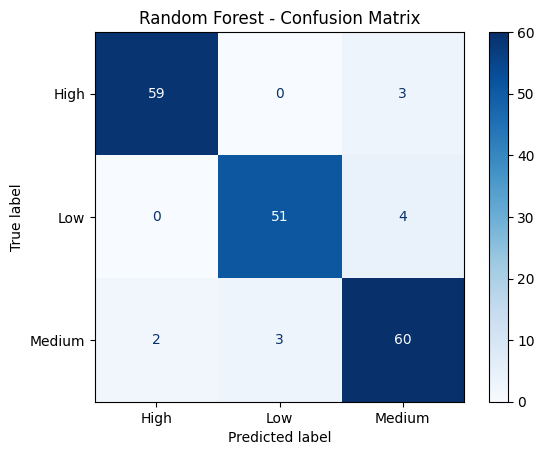

Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ XGBoost - Best Parameters:
{'model__subsample': 1.0, 'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.1}
📊 Evaluation on Test Set:
Accuracy: 0.95
F1 Score: 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.96      0.91      0.93        55
           2       0.90      0.95      0.93        65

    accuracy                           0.95       182
   macro avg       0.95      0.94      0.95       182
weighted avg       0.95      0.95      0.95       182



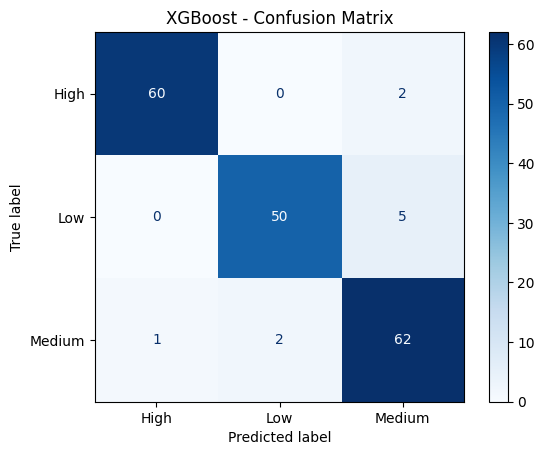

Fitting 3 folds for each of 8 candidates, totalling 24 fits

✅ Gradient Boosting - Best Parameters:
{'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05}
📊 Evaluation on Test Set:
Accuracy: 0.92
F1 Score: 0.92
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.92      0.89      0.91        55
           2       0.86      0.94      0.90        65

    accuracy                           0.92       182
   macro avg       0.93      0.92      0.92       182
weighted avg       0.93      0.92      0.92       182



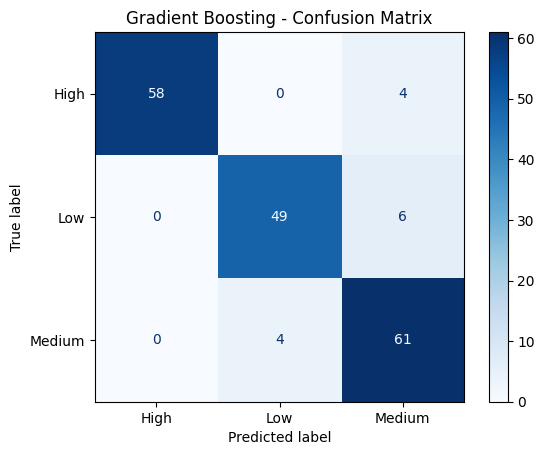


🏆 Best Classifier Based on F1 Score: XGBoost


In [31]:
best_classifier_models = {}
classification_results = {}

for name, config in classifier_params.items():
    # Delete existing runs for this model name
    runs = client.search_runs(experiment_ids=[experiment_id], filter_string=f"tag.mlflow.runName = '{name} Classifier Tuned'")
    for run in runs:
        client.delete_run(run.info.run_id)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'][0])
    ])

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=config['params'],
        n_iter=10,
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    with mlflow.start_run(run_name=f"{name} Classifier Tuned") as run:
        search.fit(X_train, y_cls_train)
        best_model = search.best_estimator_
        best_classifier_models[name] = best_model

        preds = best_model.predict(X_test)
        acc = accuracy_score(y_cls_test, preds)
        f1 = f1_score(y_cls_test, preds, average='weighted')

        mlflow.log_param("model_name", name)
        mlflow.log_params(search.best_params_)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("F1 Score", f1)

        input_example = pd.DataFrame(X_test[:1], columns=X_test.columns)
        signature = infer_signature(X_test, preds)
        mlflow.sklearn.log_model(best_model, artifact_path="classification_model", signature=signature, input_example=input_example)

        classification_results[name] = {"Accuracy": acc, "F1 Score": f1}

        print(f"\n✅ {name} - Best Parameters:")
        print(search.best_params_)
        print(f"📊 Evaluation on Test Set:")
        print(f"Accuracy: {acc:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(classification_report(y_cls_test, preds))

        cm = confusion_matrix(y_cls_test, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
        disp.plot(cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

# 🔝 Selecting Best Classifier Based on Highest F1 Score
best_cls_model_name = max(classification_results, key=lambda k: classification_results[k]["F1 Score"])
print(f"\n🏆 Best Classifier Based on F1 Score: {best_cls_model_name}")

Saving results in CSV file

In [32]:
from mlflow.tracking import MlflowClient
from datetime import datetime
import os

# Initialize MLflow client and experiment
client = MlflowClient()
experiment_name = "EduSpend_Predictive_Models"
experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
runs = client.search_runs(experiment_ids=[experiment_id])

# Create results directory if it doesn't exist
results_dir = "model_runs"
os.makedirs(results_dir, exist_ok=True)

# Get timestamp for saving
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# === Regressor Models ===
regression_data = []
for run in runs:
    name = run.data.tags.get("mlflow.runName", "")
    if "Regressor Tuned" in name:
        regression_data.append({
            "Model": name.replace(" Regressor Tuned", ""),
            "MAE": run.data.metrics.get("MAE"),
            "RMSE": run.data.metrics.get("RMSE"),
            "R2": run.data.metrics.get("R2"),
            "Run ID": run.info.run_id,
            "Run Name": name,
            "Experiment Name": experiment_name
        })

regression_df = pd.DataFrame(regression_data)
if not regression_df.empty:
    best_reg_index = regression_df["RMSE"].idxmin()
    regression_df["Best_Model"] = False
    regression_df.loc[best_reg_index, "Best_Model"] = True

    reg_filename = os.path.join(results_dir, f"regression_model_results_{timestamp}.csv")
    regression_df.to_csv(reg_filename, index=False)
    print(f"✅ Saved regression results to {reg_filename}")
else:
    print("⚠️ No regression tuned runs found.")

# === Classifier Models ===
classification_data = []
for run in runs:
    name = run.data.tags.get("mlflow.runName", "")
    if "Classifier Tuned" in name:
        classification_data.append({
            "Model": name.replace(" Classifier Tuned", ""),
            "Accuracy": run.data.metrics.get("Accuracy"),
            "F1 Score": run.data.metrics.get("F1 Score"),
            "Run ID": run.info.run_id,
            "Run Name": name,
            "Experiment Name": experiment_name
        })

classification_df = pd.DataFrame(classification_data)
if not classification_df.empty:
    best_cls_index = classification_df["F1 Score"].idxmax()
    classification_df["Best_Model"] = False
    classification_df.loc[best_cls_index, "Best_Model"] = True

    cls_filename = os.path.join(results_dir, f"classification_model_results_{timestamp}.csv")
    classification_df.to_csv(cls_filename, index=False)
    print(f"✅ Saved classification results to {cls_filename}")
else:
    print("⚠️ No classification tuned runs found.")

✅ Saved regression results to model_runs\regression_model_results_20250702_194421.csv
✅ Saved classification results to model_runs\classification_model_results_20250702_194421.csv


Saving best models separately for deployment

In [33]:
import joblib
import os

# Create output directory if it doesn't exist
os.makedirs("deployment_models", exist_ok=True)

# Paths to save models
best_regressor_path = os.path.join("deployment_models", "best_regressor.pkl")
best_classifier_path = os.path.join("deployment_models", "best_classifier.pkl")

# Save Best Regressor if not already saved
if not os.path.exists(best_regressor_path):
    joblib.dump(best_regressor_models[best_model_name], best_regressor_path)
    print(f"✅ Best Regressor saved to: {best_regressor_path}")
else:
    print(f"⚠️ Regressor already exists at: {best_regressor_path} — skipping save.")

# Save Best Classifier if not already saved
if not os.path.exists(best_classifier_path):
    joblib.dump(best_classifier_models[best_cls_model_name], best_classifier_path)
    print(f"✅ Best Classifier saved to: {best_classifier_path}")
else:
    print(f"⚠️ Classifier already exists at: {best_classifier_path} — skipping save.")

⚠️ Regressor already exists at: deployment_models\best_regressor.pkl — skipping save.
⚠️ Classifier already exists at: deployment_models\best_classifier.pkl — skipping save.


## ✅ Project Summary: EduSpend — Phase 1 & 2

### 📌 Objective
This notebook demonstrates the end-to-end development of predictive models to analyze and forecast the **Total Cost of Attendance (TCA)** for international education. The goal is to support informed planning and decision-making for students, advisors, and institutions by transforming raw cost data into actionable insights.

---

### 🔍 Phase 1: Data Exploration & Affordability Profiling

- Loaded and explored the `International_Education_Costs.csv` dataset.
- Handled missing values, verified data types, and assessed feature distributions.
- Computed the **Total Cost of Attendance (TCA)** using tuition, rent, visa, and insurance components, assuming a 1-year program and 12-month rental duration.
- Visualized cost structures by **Country** and **Degree Level** using bar and box plots.
- Created affordability tiers (Low / Medium / High) using TCA quantiles.
- Plotted TCA distributions across these affordability classes.

---

### 🧱 Phase 2: Feature Engineering & Model Development

#### ✨ Feature Engineering
- Encoded categorical features using `OneHotEncoder` and scaled numerical variables with `StandardScaler` via a `ColumnTransformer`.
- Split the dataset into training and testing subsets.
- Encoded affordability labels using `LabelEncoder`.

#### 🔁 Regression Modeling (TCA Prediction)
- Trained and evaluated 3 regressors: **Random Forest**, **XGBoost**, and **Gradient Boosting**.
- Used `MAE`, `RMSE`, and `R²` to evaluate performance on the test set.
- Performed hyperparameter tuning using `RandomizedSearchCV`.
- Tracked all models in **MLflow**, including best hyperparameters and metrics.
- Selected the **best regressor** based on lowest RMSE.

#### 🧠 Classification Modeling (Affordability Tier)
- Trained and evaluated the same 3 classifiers on the encoded tiers.
- Used `Accuracy` and `F1 Score` for model evaluation.
- Performed hyperparameter tuning with `RandomizedSearchCV`.
- Visualized confusion matrices and generated classification reports.
- Logged all results to **MLflow** and selected the **best classifier** based on highest F1 Score.

#### 🎯 Clustering
- Applied `KMeans` clustering to scaled features.
- Reduced dimensionality with `PCA` and visualized cost-based segments of destinations.

---

### 📈 Model Tracking & Auto-Selection with MLflow

- All models (baseline and tuned) were logged with full evaluation metrics, parameters, and input signatures.
- Automatically selected the **best-performing regressor and classifier** using MLflow's stored metrics.
- Visualized model performance using bar charts for easy comparison.

---

### ✅ Outcome
By the end of this notebook:
- We've built a robust and reusable ML pipeline for both regression and classification tasks.
- The results are tracked, reproducible, and performance-optimized.
- These models form the foundation for downstream deployment in a **Streamlit Budget Planner**.

---

> 📦 Next: Phase 3 — Deploy the selected models in a user-friendly Streamlit interface for real-time forecasting and exploration.